In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz

## 2.2

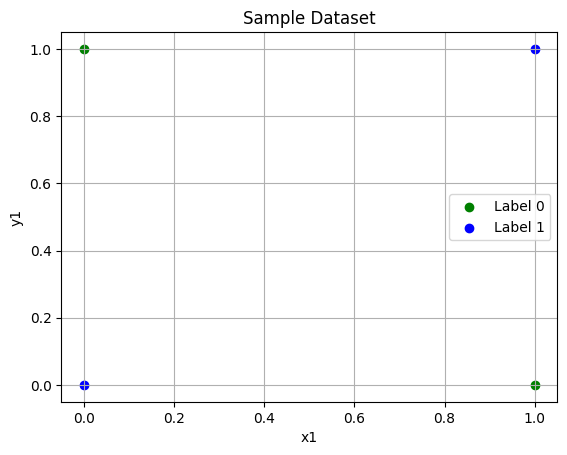

In [22]:
#question 2.2
X = [[0,0], [0,1], [1,0], [1,1]]
y = [1,0,0,1]

class_0 = [X[i] for i in range(4) if y[i]==0]
class_1 = [X[i] for i in range(4) if y[i]==1]

x0 = [x[0] for x in class_0]
y0 = [x[1] for x in class_0]
x1 = [x[0] for x in class_1]
y1 = [x[1] for x in class_1]

plt.scatter(x0, y0, c='green', label='Label 0')
plt.scatter(x1, y1, c='blue', label='Label 1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.legend()
plt.title('Sample Dataset')
plt.grid(True)
plt.savefig('Fig2_2.png')
plt.show()

In [8]:
X,y = read_data("./data/D3leaves.txt")

In [13]:
type(X), y

(numpy.ndarray, array([1, 1, 0, 0]))

In [17]:
# data = pd.read_csv("./data/D3leaves.txt", sep=" ", header=None)
# X,y = np.array([[0,0], [0,1], [1,0], [1,1]]), np.array([1,1,0,0])
clf_test = DecisionTree()
clf_test.fit(X,y)

# clf.visualize_tree('test')
type(X), y

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [114]:
float(np.unique(y)[0])

0.0

## 2.3

In [32]:
def entropy(y):
    entropy = 0
    labels = np.unique(y)
    for label in labels:
        label_counts = y[y == label]
        p1 = len(label_counts) / len(y)
        entropy += -p1*np.log2(p1)

    return entropy

def calc_gain_ratio(parent, left, right):
    info_gain = 0
    parent_entropy = entropy(parent)

    left_size = len(left)/len(parent)
    right_size = len(right)/len(parent)

    left_entropy, right_entropy = entropy(left), entropy(right)

    weighted_entropy = left_size*left_entropy + right_size*right_entropy
    info_gain = float(parent_entropy - weighted_entropy)

    if left_size > 0 and right_size > 0:  # Prevent log(0)
        split_info = - (left_size * np.log2(left_size) + right_size * np.log2(right_size))
    else:
        split_info = 0  # Avoid division by zero in the case of pure splits

    # Gain Ratio is Information Gain divided by Split Information
    if split_info != 0:
        gain_ratio = float(info_gain / split_info)
    else:
        gain_ratio = 0  # Gain Ratio is 0 if split_info is 0

    if left_entropy == 0 or right_entropy == 0:
        mutual_info = info_gain
    else:
        mutual_info = info_gain/min(left_entropy, right_entropy)

    return info_gain, gain_ratio, mutual_info

def calculate_info_gain(data):
    X = data[:, :-1]
    y = data[:,-1]

    n_samples, n_features = X.shape
    best_split = {
        "best_gain_ratio" : -1,
        "best_gain" : -1,
        "mutual_info" : -1,
        "feature" : None,
        "threshold" : None
    }
    info_gains = []
    info_gain_ratios = []
    mutual_infos = []
    for feature_index in range(n_features):
        feature_values = X[:, feature_index]

        thresholds = np.unique(feature_values)
        print(f"\nFor feature index : {feature_index}")
        for threshold in thresholds:
            left_indices = feature_values >= threshold
            right_indices = feature_values < threshold

            info_gain, gain_ratio, mutual_info = calc_gain_ratio(y, y[left_indices], y[right_indices])

            info_gains.append(info_gain)
            info_gain_ratios.append(gain_ratio)
            mutual_infos.append(mutual_info)

            
            print(f"\item Threshold = {threshold:.5f}, IG = {info_gain:.5f}, Gain ratio = {gain_ratio:.5f}, Mutual Info = {mutual_info:.5f}")
            
            if gain_ratio > best_split.get("best_gain_ratio", -1):
                best_split["best_gain_ratio"] = gain_ratio
                best_split["best_gain"] = info_gain
                best_split["threshold"] = float(threshold)
                best_split["feature"] = feature_index
                best_split["mutual_info"] = mutual_info
                
    return info_gains, info_gain_ratios, mutual_infos, best_split



data = np.loadtxt("./data/Druns.txt")
inf_gain, inf_gain_ratio, mutual_infos, best_split = calculate_info_gain(data)
print("\n Best Split (Feature Index, Threshold, Information Gain, Information Gain Ratio):", best_split)
print(inf_gain)
# print(inf_gain_ratio)
print(mutual_infos)


For feature index : 0
\item Threshold = 0.00000, IG = 0.00000, Gain ratio = 0.00000, Mutual Info = 0.00000
\item Threshold = 0.10000, IG = 0.04418, Gain ratio = 0.10052, Mutual Info = 0.04418

For feature index : 1
\item Threshold = -2.00000, IG = 0.00000, Gain ratio = 0.00000, Mutual Info = 0.00000
\item Threshold = -1.00000, IG = 0.04418, Gain ratio = 0.10052, Mutual Info = 0.04418
\item Threshold = 0.00000, IG = 0.03827, Gain ratio = 0.05595, Mutual Info = 0.05008
\item Threshold = 1.00000, IG = 0.00489, Gain ratio = 0.00578, Mutual Info = 0.00602
\item Threshold = 2.00000, IG = 0.00108, Gain ratio = 0.00114, Mutual Info = 0.00133
\item Threshold = 3.00000, IG = 0.01631, Gain ratio = 0.01641, Mutual Info = 0.02260
\item Threshold = 4.00000, IG = 0.04945, Gain ratio = 0.04975, Mutual Info = 0.07608
\item Threshold = 5.00000, IG = 0.10520, Gain ratio = 0.11124, Mutual Info = 0.17779
\item Threshold = 6.00000, IG = 0.19959, Gain ratio = 0.23610, Mutual Info = 0.36718
\item Threshold =

In [115]:
class Node:
    def __init__(self, feature=None, gain=None, left=None, right=None, is_leaf=None, prediction=None, threshold=None) -> None:
        self.feature = feature
        self.gain_ratio = gain
        self.left_node = left
        self.right_node = right
        self.is_leaf = is_leaf
        self.prediction = prediction
        self.threshold = threshold

    def print_node(self):
        print("Node feature ", self.feature)
        print("Node gain ", self.gain_ratio)
        print("Node value ", self.prediction)

class DecisionTree:
    def __init__(self) -> None:
        self.root = None
        self.depth = 0
        self.features = list
        self.x_train = np.array
        self.y_train = np.array
    
    def entropy(self, y):
        """
        computes entropy of given labels

        params:
            y(ndarray) : Input label values
        outputs:
            entropy(float) : entropy of given label values
        """
        
        entropy = 0
        labels = np.unique(y)
        for label in labels:
            label_counts = y[y == label]
            p1 = len(label_counts) / len(y)
            entropy += -p1*np.log2(p1)

        return entropy


    def calc_gain_ratio(self, parent, left, right):
        info_gain = 0
        # print("calc parent entropy ", parent)
        parent_entropy = self.entropy(parent)

        left_size = len(left)/len(parent)
        right_size = len(right)/len(parent)

        left_entropy, right_entropy = self.entropy(left), self.entropy(right)

        weighted_entropy = left_size*left_entropy + right_size*right_entropy
        info_gain = parent_entropy - weighted_entropy

        if left_size > 0 and right_size > 0:  # Prevent log(0)
            split_info = - (left_size * np.log2(left_size) + right_size * np.log2(right_size))
        else:
            split_info = 0  # Avoid division by zero in the case of pure splits

        # Gain Ratio is Information Gain divided by Split Information
        if split_info != 0:
            gain_ratio = info_gain / split_info
        else:
            gain_ratio = 0  # Gain Ratio is 0 if split_info is 0

        return gain_ratio


    def split_dataset(self, dataset, feature, threshold):
        """"
        splits the dataset into two datasets based on the given feature and threshold
        params:

        returns:
            left_dataset:
            right_dataset:
        """
        left = []
        right = []

        for row in dataset:
            if row[feature] >= threshold:
                left.append(row)
            else:
                right.append(row)
        
        left = np.array(left)
        right = np.array(right)

        return left, right

    def best_split(self, dataset, n_samples, n_features):
        """
        finds the best split for the given dataset
        returs a dict: with best split feature index, threshold, gain, left & right datasets
        """

        best_split = {
            "gain_ratio" : -1,
            "threshold" : None,
            "feature" : None
        }

        for feature_index in range(n_features):
            feature_values = dataset[:, feature_index]

            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_dataset, right_dataset = self.split_dataset(dataset, feature_index, threshold)

                if len(left_dataset) and len(right_dataset):
                    #get the y values of parent, left and right node to calculate info gain
                    y, left_y, right_y = dataset[:,-1], left_dataset[:,-1], right_dataset[:,-1]
                    gain_ratio = self.calc_gain_ratio(y, left_y, right_y)

                    #update the best split based on the info gain
                    if gain_ratio > best_split.get("gain_ratio", -1):
                        best_split["gain_ratio"] = gain_ratio
                        best_split["threshold"] = threshold
                        best_split["feature"] = feature_index
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset

        return best_split

    def calculate_leaf_value(self, y):
        """
        calculates the most occuring value of y in the given list of y
        """

        y = list(y)

        count_0 = y.count(0.0)
        count_1 = y.count(1.0)

        if count_1 >= count_0:
            return 1.0
        else:
            return 0.0
    
    def build_tree(self, dataset, current_depth=0):
        X, y = dataset[:, :-1], dataset[:,-1]
        n_samples, n_features = X.shape
        if len(np.unique(y)) == 0:
            return Node(is_leaf=True, prediction=int(np.unique(y)[0]))
        if n_samples == 0:
            # print("# samples = 0 : stopping and returning None")
            return Node(is_leaf=True, prediction=1)
        
        current_entropy = self.entropy(y)
        
        if current_entropy == 0:
            # print("current_entropy = 0 : stopping and returning leaf node :", self.calculate_leaf_value(y))
            return Node(is_leaf=True, prediction=self.calculate_leaf_value(y))
        
        #keep splitting the dataset until the stopping criteria is met
        best_split = self.best_split(dataset, n_samples, n_features)
        
        if best_split["gain_ratio"] == 0:
            # print("gain is 0 : stopping and returning leaf node :", 1)
            return Node(is_leaf=True, prediction=1)
        else:
            left_node = self.build_tree(best_split["left_dataset"], current_depth+1)
            right_node = self.build_tree(best_split["right_dataset"], current_depth+1)

            return Node(best_split["feature"], best_split["gain_ratio"], left_node, right_node, False, None, best_split["threshold"])


    def fit(self, X, y):
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        """
        predicts the output for each instance in the feature matrix X
        """

        predictions = []

        for each in X:
            prediction = self.make_prediction(each, self.root)
            predictions.append(prediction)

        return np.array(predictions)
        
    def make_prediction(self, x, node):
        
        if node.is_leaf:
            # print(node.prediction, "leaf node value")
            return node.prediction
        else:
            if x[node.feature] >= node.threshold:
                return self.make_prediction(x, node.left_node)
            else:
                return self.make_prediction(x, node.right_node)
            
    def _add_nodes(self, dot, node, feature_names, class_names):
        if node is not None:
            if node.is_leaf:
                if class_names is not None:
                    label = f"Class: {class_names.get(node.prediction, node.prediction)}"
                else:
                    label = f"Class: {node.prediction}"
            else:
                if feature_names is not None:
                    label = f"X{feature_names[node.feature]} >= {node.threshold:.2f}" # \nEntropy: {node.entropy:.2f}\nGain Ratio: {node.gain_ratio:.2f}"
                else:
                    label = f"X{node.feature+1} >= {node.threshold:.2f}" # \nEntropy: {node.entropy:.2f}\nGain Ratio: {node.gain_ratio:.2f}"
            
            dot.node(str(id(node)), label=label)

            if node.left_node is not None:
                dot.edge(str(id(node)), str(id(node.left_node)), label="True")
                self._add_nodes(dot, node.left_node, feature_names, class_names)

            if node.right_node is not None:
                dot.edge(str(id(node)), str(id(node.right_node)), label="False")
                self._add_nodes(dot, node.right_node, feature_names, class_names)
    
    def visualize_tree(self, plot_name, feature_names=None, class_names=None):
        dot = graphviz.Digraph(format='png')
        self._add_nodes(dot, self.root, feature_names, class_names)
        dot.render(plot_name)  # Generates decision_tree.png

    def count_nodes(self):
        return self._count_nodes_recursive(self.root)

    def _count_nodes_recursive(self, node):
        if node.is_leaf == False:  # Internal node
            _, left_subtree, right_subtree = node.threshold, node.left_node, node.right_node
            return 1 + self._count_nodes_recursive(left_subtree) + self._count_nodes_recursive(right_subtree)
        else:  # Leaf node
            return 1

def read_data(filename):
    data = pd.read_csv(filename, sep= ' ', index_col=False, header=None, names = ['x1', 'x2', 'y'])
    X = data[['x1','x2']].values
    y = data[['y']].values

    return X, y

In [59]:
def plot_decision_boundary(X, y, classifier, figname):
    # Create a mesh to plot the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    # Create a scatter plot of the data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], label='Class 0', marker='o', c='purple', s=20)
    plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], label='Class 1', marker='x', c='orange', s=20)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    # Overlay the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuOr, alpha=0.5)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.legend(loc='best')
    plt.title('Decision Boundary and Scatter Plot')
    plt.grid(True)
    plt.savefig(figname)
    plt.show()

## 2.4

In [78]:
# data = pd.read_csv("./data/D3leaves.txt", sep=" ", header=None)
X,y = read_data("./data/D3leaves.txt")
clf = DecisionTree()
clf.fit(X,y)

clf.visualize_tree('D3')

## 2.5

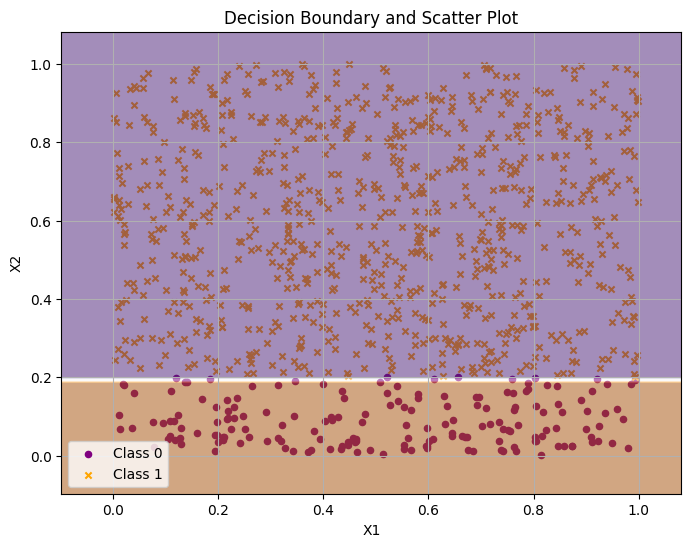

In [60]:
X,y = read_data("./data/D1.txt")
clf = DecisionTree()
clf.fit(X,y)

clf.visualize_tree('D1')
plot_decision_boundary(X, y, clf, 'db_D1.png')

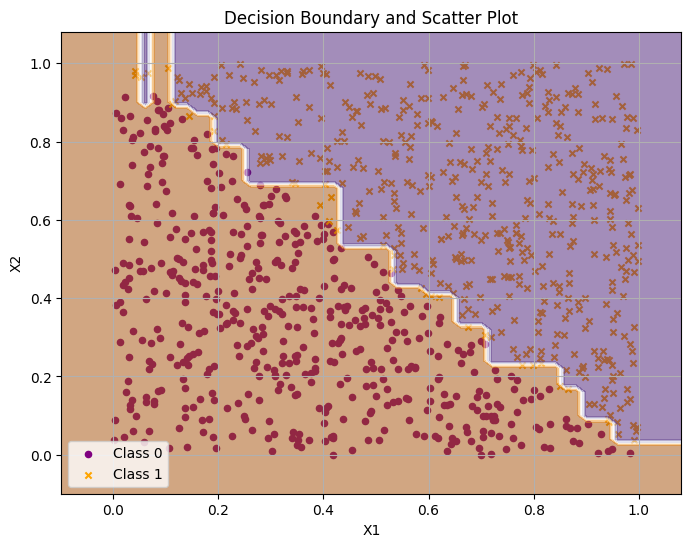

In [61]:
X,y = read_data("./data/D2.txt")
clf = DecisionTree()
clf.fit(X,y)

clf.visualize_tree('D2')
plot_decision_boundary(X, y, clf, 'db_D2.png')

## 2.7

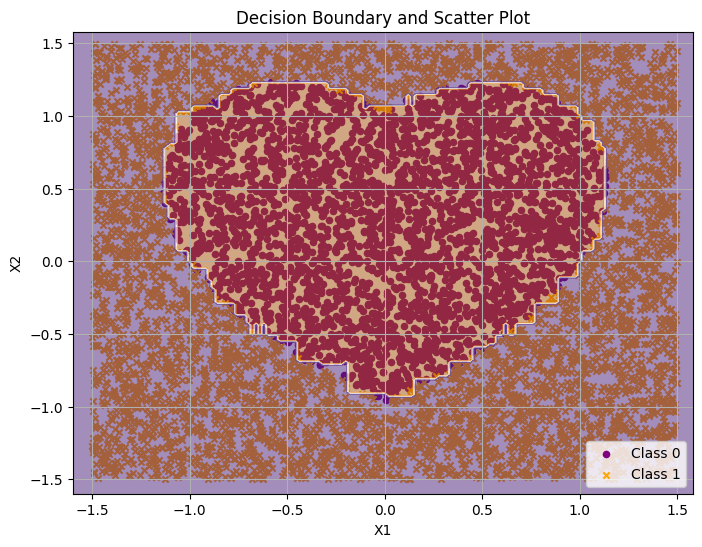

In [97]:
X,y = read_data("./data/Dbig.txt")

random_state=41
n_samples = X.shape[0]
train_size = 8192 
np.random.seed(random_state)

shuffled_indices = np.random.permutation(np.arange(n_samples))

train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Initialize and fit the decision tree
clf8192 = DecisionTree()
clf8192.fit(X_train, y_train)

# Visualize the decision tree
clf8192.visualize_tree('D8192')
plot_decision_boundary(X_train, y_train, clf8192, 'db_D8192.png')

In [98]:
print("Number of nodes : ", clf8192.count_nodes())

Number of nodes :  275


In [89]:
XD2048, yD2048 = X_train[:2048], y_train[:2048]
XD512, yD512 = X_train[:512], y_train[:512]
XD128, yD128 = X_train[:128], y_train[:128]
XD32, yD32 = X_train[:32], y_train[:32]

## Trees boundaries for each subset dataset

## number of nodes
8192 = 275
2048 = 125
512 = 57
128 = 27
32 = 9

Number of nodes :  125


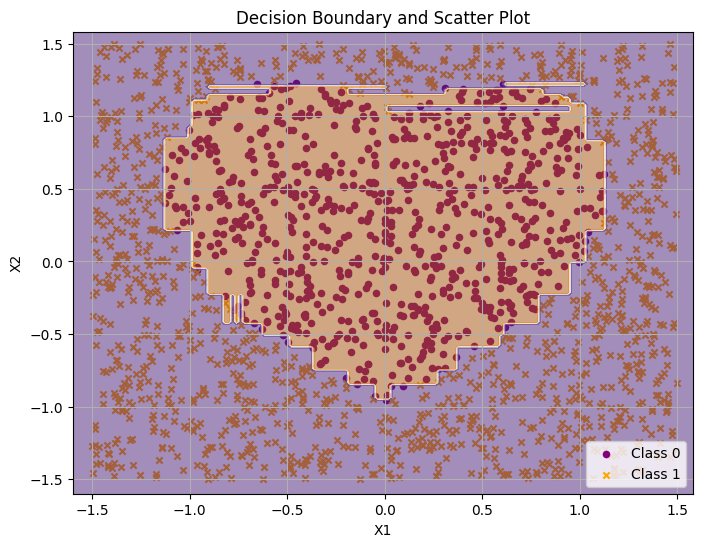

In [91]:
clf2048 = DecisionTree()
clf2048.fit(XD2048, yD2048)
clf2048.visualize_tree('D2048')
print("Number of nodes : ", clf2048.count_nodes())
plot_decision_boundary(XD2048, yD2048, clf2048, 'db_2048.png')

Number of nodes :  57


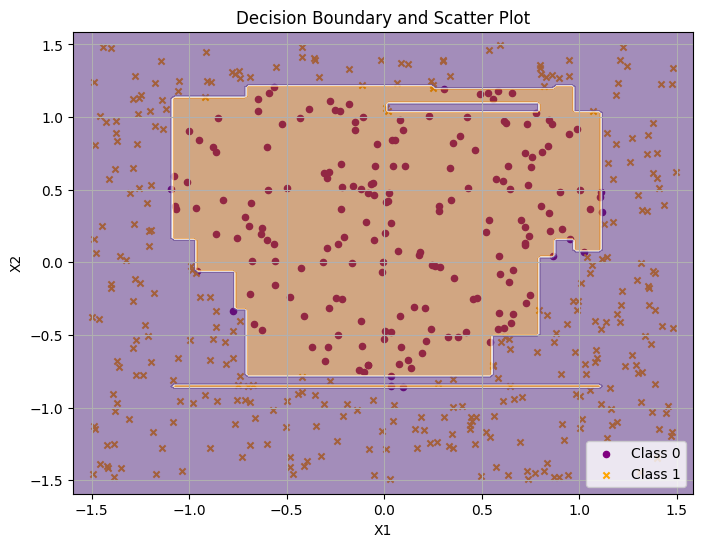

In [92]:
clf512 = DecisionTree()
clf512.fit(XD512, yD512)
clf512.visualize_tree('D512')
print("Number of nodes : ", clf512.count_nodes())
plot_decision_boundary(XD512, yD512, clf512, 'db_512.png')

Number of nodes :  27


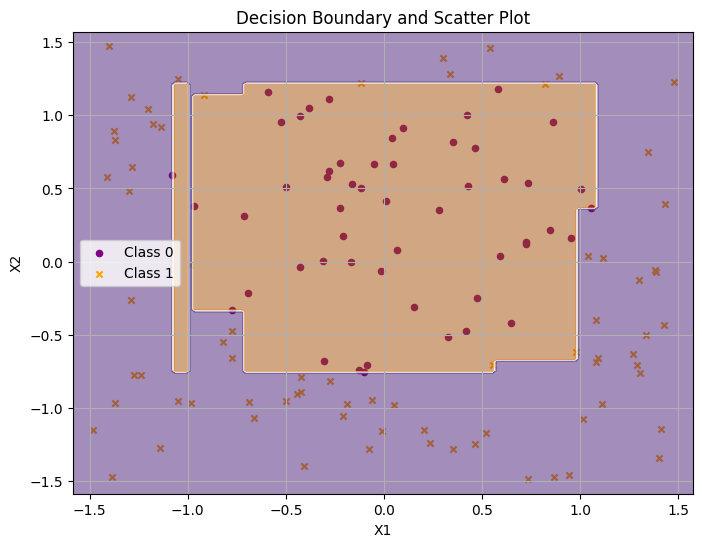

In [116]:
clf128 = DecisionTree()
clf128.fit(XD128, yD128)
clf128.visualize_tree('D128')
print("Number of nodes : ", clf128.count_nodes())
plot_decision_boundary(XD128, yD128, clf128, 'db_128.png')

Number of nodes :  9


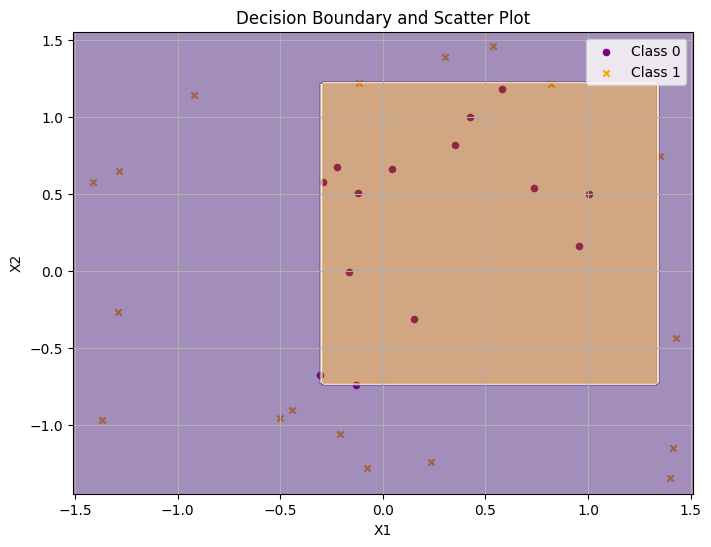

In [95]:
clf32  = DecisionTree()
clf32 .fit(XD32, yD32)
clf32 .visualize_tree('D32')
print("Number of nodes : ", clf32.count_nodes())
plot_decision_boundary(XD32, yD32, clf32, 'db_32.png')

### Errors for each dataset's decision tree

In [117]:
# Predit for each tree
pred_8192 = clf8192.predict(X_test)
pred_2048 = clf2048.predict(X_test)
pred_512 = clf512.predict(X_test)
pred_128 = clf128.predict(X_test)
pred_32 = clf32.predict(X_test)

#errors
def error(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    false_predictions = np.sum(y_true != y_pred)
    
    return float(false_predictions / total_samples)
    
err_8192 = error(y_test, pred_8192)
err_2048 = error(y_test, pred_2048)
err_512 = error(y_test, pred_512)
err_128 = error(y_test, pred_128)
err_32 = error(y_test, pred_32)

In [118]:
err_8192, err_2048, err_512, err_128, err_32

(0.016039823008849558,
 0.025442477876106196,
 0.05420353982300885,
 0.0702433628318584,
 0.2334070796460177)

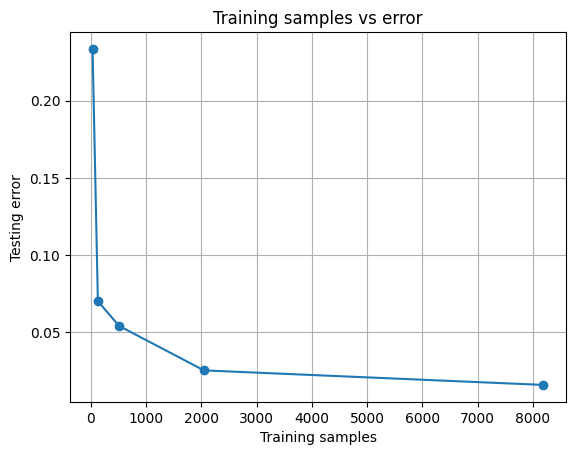

In [121]:
x = [8192, 2048, 512, 128, 32]
y = [err_8192, err_2048, err_512, err_128, err_32]
plt.plot(x,y, marker='o')
plt.grid(True)
plt.title('Training samples vs error')
plt.xlabel("Training samples")
plt.ylabel("Testing error")
plt.savefig('learning_curve.png')

# Q3 Sklearn

In [122]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

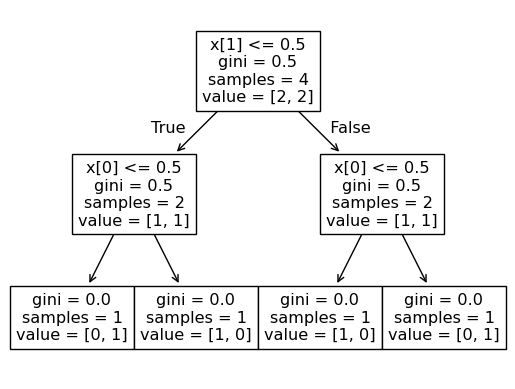

In [123]:
check = DecisionTreeClassifier()
X,y = np.array([[0,0], [0,1], [1,0], [1,1]]), np.array([1,0,0,1])
check.fit(X,y)

tree.plot_tree(check)

Prediction error for 32 training size:  0.14878318584070796
Number of Nodes for 32 training size :  9
Prediction error for 8192 training size:  0.014380530973451327
Number of Nodes for 8192 training size :  247


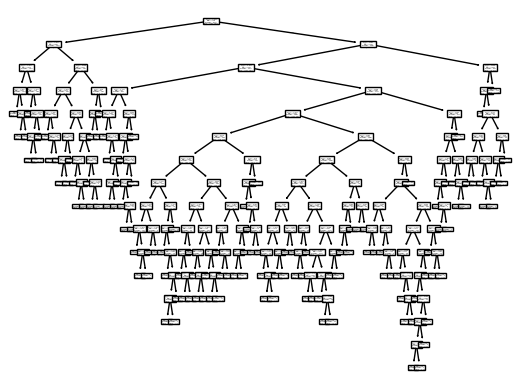

In [124]:
clf_8192 = DecisionTreeClassifier()
clf_8192.fit(X_train, y_train)
clf_32 = DecisionTreeClassifier()
clf_32.fit(XD32, yD32)

nodes_32 = clf_32.tree_.node_count
pred_32 = clf_32.predict(X_test)
err_32 = error(y_test, pred_32)
# err_32 = 1.0 - accuracy_score(y_test, pred_32)

tree.plot_tree(clf_32)

print("Prediction error for 32 training size: ", err_32)
print("Number of Nodes for 32 training size : ", nodes_32)

nodes_8192 = clf_8192.tree_.node_count
pred_8192 = clf_8192.predict(X_test)
err_8192 = error(y_test, pred_8192)
# err_8192 = 1.0 - accuracy_score(y_test, pred_8192)

tree.plot_tree(clf_8192)

print("Prediction error for 8192 training size: ", err_8192)
print("Number of Nodes for 8192 training size : ", nodes_8192)

Prediction error for 2048 training size:  0.0293141592920354
Number of Nodes for 2048 training size :  121


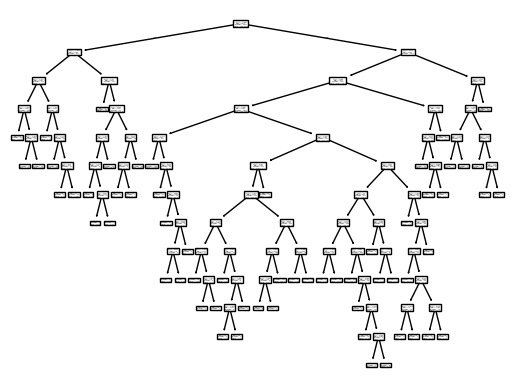

In [125]:
clf_2048 = DecisionTreeClassifier()
clf_2048.fit(XD2048, yD2048)

nodes_2048 = clf_2048.tree_.node_count
pred_2048 = clf_2048.predict(X_test)
err_2048 = error(y_test, pred_2048)
# err_2048 = 1.0 - accuracy_score(y_test, pred_2048)

tree.plot_tree(clf_2048)

print("Prediction error for 2048 training size: ", err_2048)
print("Number of Nodes for 2048 training size : ", nodes_2048)

Prediction error for 512 training size:  0.05420353982300885
Number of Nodes for 512 training size :  57


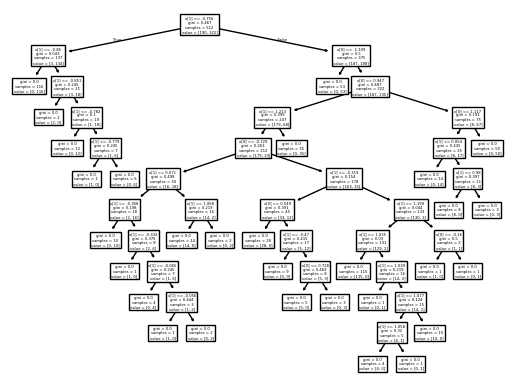

In [126]:
clf_512 = DecisionTreeClassifier()
clf_512.fit(XD512, yD512)

nodes_512 = clf_512.tree_.node_count
pred_512 = clf_512.predict(X_test)
err_512 = error(y_test, pred_512)
# err_512 = 1.0 - accuracy_score(y_test, pred_512)

tree.plot_tree(clf_512)

print("Prediction error for 512 training size: ", err_512)
print("Number of Nodes for 512 training size : ", nodes_512)

Prediction error for 128 training size:  0.10508849557522124
Number of Nodes for 128 training size :  29


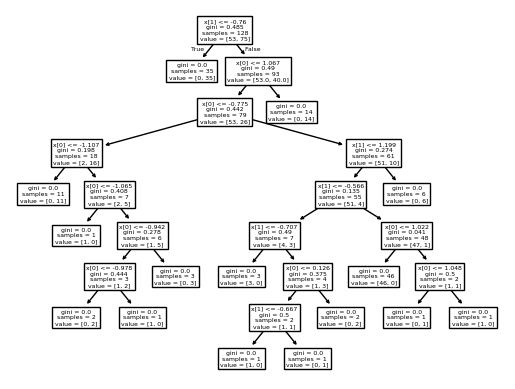

In [127]:
clf_128 = DecisionTreeClassifier()
clf_128.fit(XD128, yD128)

nodes_128 = clf_128.tree_.node_count
pred_128 = clf_128.predict(X_test)
err_128 = error(y_test, pred_128)
# err_128 = 1.0 - accuracy_score(y_test, pred_128)

tree.plot_tree(clf_128)

print("Prediction error for 128 training size: ", err_128)
print("Number of Nodes for 128 training size : ", nodes_128)

Prediction error for 32 training size:  0.14878318584070796
Number of Nodes for 32 training size :  9


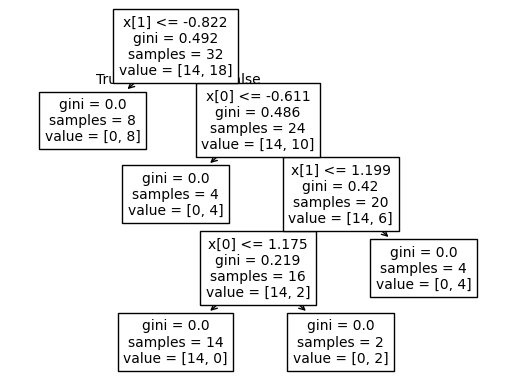

In [128]:
clf_32 = DecisionTreeClassifier()
clf_32.fit(XD32, yD32)

nodes_32 = clf_32.tree_.node_count
pred_32 = clf_32.predict(X_test)
err_32 = error(y_test, pred_32)
# err_32 = 1.0 - accuracy_score(y_test, pred_32)

tree.plot_tree(clf_32)

print("Prediction error for 32 training size: ", err_32)
print("Number of Nodes for 32 training size : ", nodes_32)

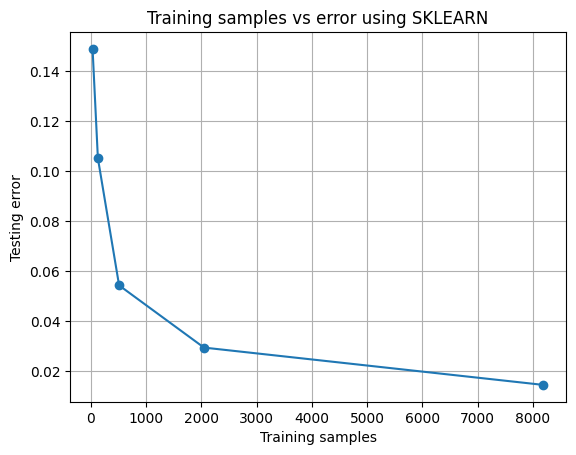

In [130]:
x = [8192, 2048, 512, 128, 32]
y = [err_8192, err_2048, err_512, err_128, err_32]
plt.plot(x,y, marker='o')
plt.grid(True)
plt.title('Training samples vs error using SKLEARN')
plt.xlabel("Training samples")
plt.ylabel("Testing error")
plt.savefig('learning_curve_sklearn.png')

## Q4 Lagrange

In [132]:
from scipy.interpolate import lagrange

In [136]:
a = 0
b = 2*np.pi
n = 100

x = np.linspace(a, b, n)
y = np.sin(x)

#lagrange model
h = lagrange(x, y)

x_test = np.linspace(a, b, n)
y_test = np.sin(x_test)

train_error = np.mean((h(x)-y)**2)
test_error = np.mean((h(x_test)-y_test)**2)

print("Train Error:", train_error)
print("Test Error:", test_error)

results = []
x_noisy_01 = None
for epsilon_stddev in [0.0, 0.1, 0.2, 0.3, 0.4]:
    # Add Gaussian noise to 'x' values
    x_noisy_values = x + np.random.normal(0, epsilon_stddev, n)

    x_noisy_test = x_test + np.random.normal(0, epsilon_stddev, n)
    
    # Calculate 'y_noisy_values' using the sine function with noisy 'x'
    y_noisy_values = np.sin(x_noisy_values)

    if epsilon_stddev == 0.1:
        x_noisy_01 = x_noisy_values
    # Build a Lagrange interpolation model 'f_noisy' using noisy data
    f_noisy = lagrange(x_noisy_values, y_noisy_values)

    # Calculate train error with noisy data
    train_error = np.mean((f_noisy(x_noisy_test) - y) ** 2)

    # Calculate test error with noisy data
    test_error = np.mean((f_noisy(x_test) - y_test) ** 2)

    # Store the results
    results.append((epsilon_stddev, train_error, test_error))
for epsilon_stddev, train_error, test_error in results:
    print(f"Standard Deviation of Noise: {epsilon_stddev:.2f}")
    # print(f"Train Error: {train_error}")
    print(f"Test Error: {test_error}")
    print()

Train Error: 3.6481952178251126e+138
Test Error: 3.6481952178251126e+138
Standard Deviation of Noise: 0.00
Test Error: 3.6481952178251126e+138

Standard Deviation of Noise: 0.10
Test Error: 4.4574033972668335e+139

Standard Deviation of Noise: 0.20
Test Error: 3.0355283003801026e+148

Standard Deviation of Noise: 0.30
Test Error: 3.275371136743591e+145

Standard Deviation of Noise: 0.40
Test Error: 9.608248872842654e+139



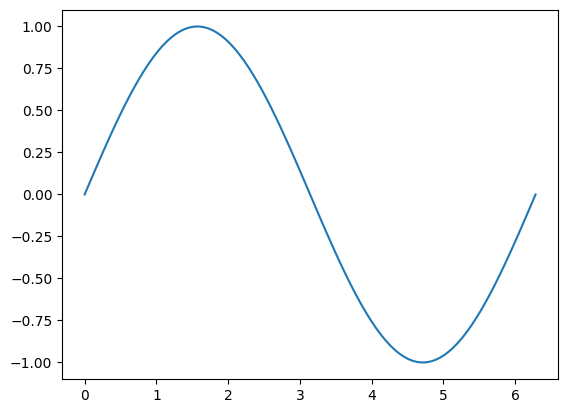

In [140]:
plt.plot(x, y)
plt.savefig('lag.png')

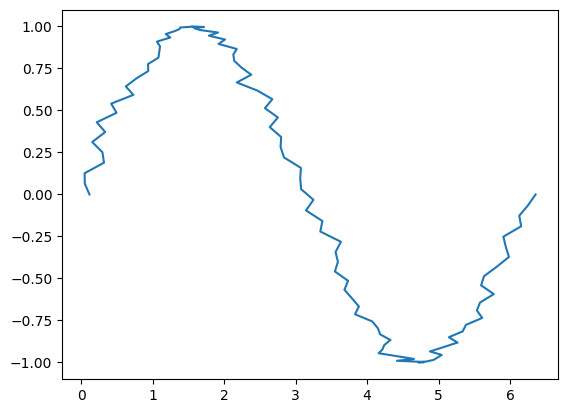

In [141]:
plt.plot(x_noisy_01,y)
plt.savefig('lag_noisy.png')